# Unbounded Knapsack

A slight variation of the 0/1 knapsack problem. Previously, we could only take an item once or not take it. Now, we can take each item any number of times we want.

> Q: Given a list of N items, and a backpack with a limited capacity, return the maximum total profit that can be contained in the backpack. The i-th item's profit is profit[i] and its weight is weight[i]. Assume you can have an unlimited number of each item available.

We build a decision tree, where at every step we choose to include this current item, or ignore this item. We can also consider the next item, or ignore the next item. Since we can include a given item multiple times, the height of our decision tree will end up being our capacity $C$ in the *worst* case. This is different compared to the 0/1 problem, where our height of decision tree was $n$ which is the number of items.

To illustrate how to form our decision trees, let's examine the tree for the **0/1 problem**.

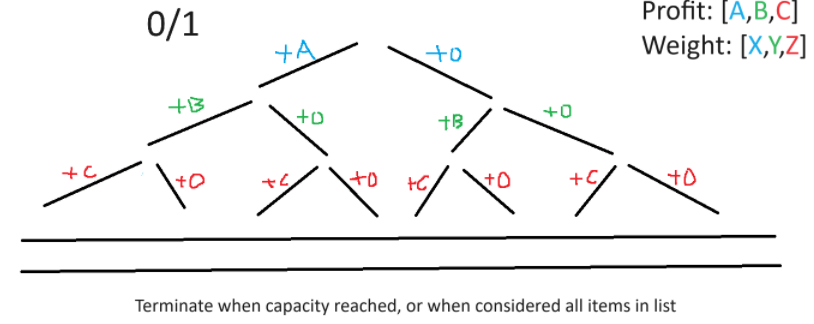

At every level, we decide whether to include this item or not. We then move on to the next item, where we start a new level. If we either hit our capacity, **or** the item we're considering hits the end of the list, then we strictly terminate.

> We have chosen to ignore displaying the capacity/weights, because the only purpose of these is to figure out if we want to terminate going below any further.

However, the **unbounded** problem presents a different decision tree.

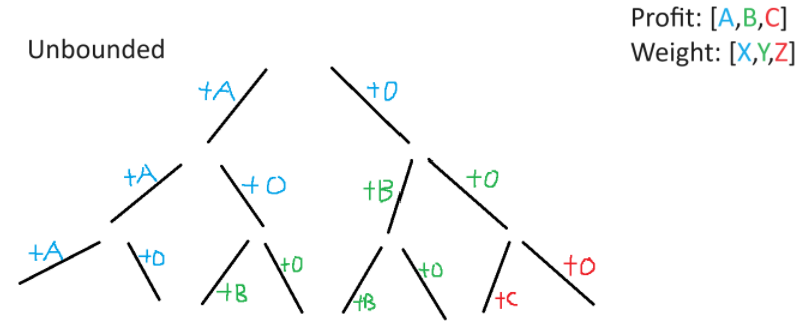

- In the left subtree, we have chosen *to include* this current item `i`
  - If we traverse this, then we continue to consider the current item `i`; whether to include or exclude it
    - In contrast to `0/1` case where if we include this item, we automatically move on to the next item `i+1`
  - This means we consider all possibilities of combinations of items `i` till the last item `n-1`
- In the right subtree, we have chosen *skip* this current item `i`
  - If we traverse this, then we consider the next item `i+1`; whether to include or exclude the next item
  - This means we'll only consider possibilities of the next item `i+1` till the last item `n-1`

*Permutation and Combination notes:*

Suppose in one branch we have chosen 2 `A`s and 3 `B`s. This is the only branch where we chose 2 `A`s and 3 `B`s, so order technically doesnt matter! We do not distinguish between branches like that.
- there is no other way we can get 2 `A`s and 3 `B`s
  
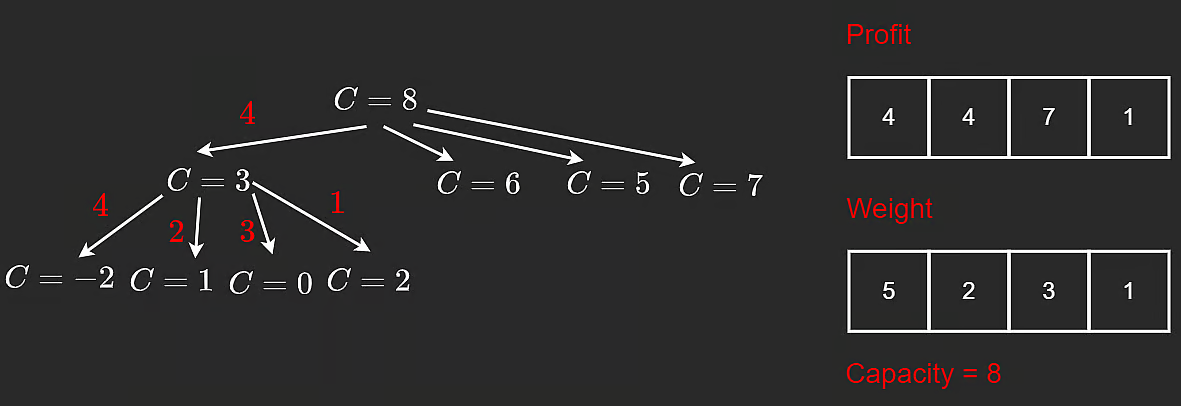

In the worst case, the height of the tree is the capacity $C$ (not $n$ as in the `0/1` case). Hence our worst case complexity is $O(2^C)$. For example, if we had an item with weight `1`, we can select it $C$ times and that makes our tree of height $C$.

## Implementation

### Brute-Force Approach

Implementation wise, the `0/1` case and the `unbounded` case literally only differ by one line. When we choose to include item `i`, we don't need to skip `i` by doing `i+1`; we can simply consider `i` again.

In [ ]:
# Brute force Solution
# Time: O(2^C), Space: O(C)
# Where C is the capacity.
def dfs(profit, weight, capacity):
    return dfsHelper(0, profit, weight, capacity)

def dfsHelper(i, profit, weight, capacity):
    if i == len(profit):
        return 0

    # Skip item i
    maxProfit = dfsHelper(i + 1, profit, weight, capacity)

    # Include item i
    newCap = capacity - weight[i]
    if newCap >= 0:
        #THIS IS THE ONLY LINE WHERE IT DIFFERS!!
        p = profit[i] + dfsHelper(i, profit, weight, newCap)
        # Compute the max
        maxProfit = max(maxProfit, p)

    return maxProfit


> note that `newCap` is the remaining capacity in the bag at any point

### Top Down DP, Memoization approach

We see repeating sub-problems which allow the use of memoization/caching. When we skip the `i`th item, we in fact only consider items `i+1` till `n-1` with a current capacity of `curCap` hence this is a subproblem that may repeat itself many times.

Again, approach is almost identical to `0/1` case. We use a 2D grid here.

In [ ]:
# Memoization Solution
# Time: O(n * m), Space: O(n * m)
# Where n is the number of items & m is the capacity.
def memoization(profit, weight, capacity):
    # A 2d array, with N rows and M + 1 columns, init with -1's
    # This is our problem space - two-dimensional grid
    N, M = len(profit), capacity
    cache = [[-1] * (M + 1) for _ in range(N)]
    return memoHelper(0, profit, weight, capacity, cache)

def memoHelper(i, profit, weight, capacity, cache):
    if i == len(profit):
        return 0
    if cache[i][capacity] != -1:
        return cache[i][capacity]

    # Skip item i
    cache[i][capacity] = memoHelper(i + 1, profit, weight, capacity, cache)
    
    # Include item i
    newCap = capacity - weight[i]
    if newCap >= 0:
        p = profit[i] + memoHelper(i, profit, weight, newCap, cache)
        # Compute the max
        cache[i][capacity] = max(cache[i][capacity], p)

    return cache[i][capacity]

### Bottom Up DP, Tabulation Approach

The true DP approach would be bottom up.

In `0/1` case, 
- if we skip item `i`, then we go one row above to consider the previous element. We simply get the value at `i-1` from the spot directly above
- if we include item `i`, we go one row above to `[i-1]` and `weight[i]` steps left to get the previous valid capacity

In the unbounded case,
- If we skip item `i`, we still go one row above directly above
- If we include item `i`, we stay on the current row and move to the column `weight[i]` steps left

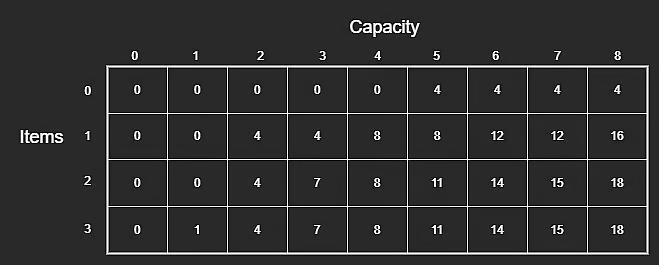

In [ ]:

# Dynamic Programming Solution
# Time: O(n * m), Space: O(n * m)
# Where n is the number of items & m is the capacity.
def dp(profit, weight, capacity):
    N, M = len(profit), capacity
    dp = [[0] * (M + 1) for _ in range(N)]

    # Fill the first column and row to reduce edge cases
    for i in range(N):
        dp[i][0] = 0
    for c in range(M + 1):
        if weight[0] <= c:
            dp[0][c] = (c // weight[0]) * profit[0] 

    for i in range(1, N):
        for c in range(1, M + 1):
            #go to the spot directly above
            skip = dp[i-1][c]
            include = 0
            if c - weight[i] >= 0:
                #stay on this row and add profit to the spot that is weight[i] spots left
                include = profit[i] + dp[i][c - weight[i]]
            dp[i][c] = max(include, skip)
    return dp[N-1][M]


We also have an optimized solution for space. Since to compute the next row down, we only need the previous row, then at any point in time we can simply maintain 2 rows of size `(2,c+1)` instead of the solution space `(n,c+1)`

In [ ]:
# Memory optimized Dynamic Programming Solution
# Time: O(n * m), Space: O(m)
def optimizedDp(profit, weight, capacity):
    N, M = len(profit), capacity
    dp = [0] * (M + 1)

    for i in range(N):
        curRow = [0] * (M + 1)
        for c in range(1, M + 1):
            skip = dp[c]
            include = 0
            if c - weight[i] >= 0:
                include = profit[i] + curRow[c - weight[i]]
            curRow[c] = max(include, skip)
        dp = curRow
    return dp[M]


The time complexity of all the DP approaches is $O(n*C)$ which is the size of the solution space. Interestingly enough, in all these DP problems, the DP time complexity is the size of our solution space. In other words, if we had to specify 3 variables instead, our time complexity will be $O(x_1*x_2*x_3)$

The space complexity of the unoptimized approach is $O(n*C)$ and $O(C)$ for the optimized approach.

---

## Problem: Coin Change

You are given an integer array coins representing coins of different denominations (e.g. 1 dollar, 5 dollars, etc) and an integer amount representing a target amount of money.

Return the fewest number of coins that you need to make up the exact target amount. If it is impossible to make up the amount, return -1.

You may assume that you have an unlimited number of each coin.

In [5]:
#my top-down sol quite inefficient lol
def coinChange(coins,amount):

    def topdown(i,coins,remain,cache):
        #base cases
        if remain==0:
            print('weve found it!')
            return 0
        #check if we've reached the end, but STILL VALID
        if i==len(coins):
            print('not possible')
            return None
        #caching
        if (i,remain) in cache:
            return cache[i,remain]

        print('before recursion, considering skipping',coins[i],'remaining',remain)

        skip=topdown(i+1,coins,remain,cache)
        #so that if we dont update include, then well always skip
        include=None
        #check if we can still include. Only include if we can.
        #this way, remain will never dip to negative. Only positive or zero
        if remain-coins[i]>=0:
            print('before recursion, considering adding',coins[i],'remaining',remain)
            res=topdown(i,coins,remain-coins[i],cache)
            #only add if res is a value
            if res!=None:
                include= 1+res
            else:
                include=None
        
        #compare the two
        if include!=None and skip!=None:
            cache[(i,remain)]=min(skip,include)
        elif skip==None and include!=None:
            cache[(i,remain)]=include
        elif skip!=None and include==None:
            cache[(i,remain)]=skip
        else:
            cache[(i,remain)]=None

        print('after recursion,adding to cache (i,remain)',(i,remain),cache[(i,remain)])
        return cache[(i,remain)]
    
    final=topdown(0,coins,amount,{})
    return final if final!=None else -1

coinChange([1,2],4)


before recursion, considering skipping 1 remaining 4
before recursion, considering skipping 2 remaining 4
not possible
before recursion, considering adding 2 remaining 4
before recursion, considering skipping 2 remaining 2
not possible
before recursion, considering adding 2 remaining 2
weve found it!
after recursion,adding to cache (i,remain) (1, 2) 1
after recursion,adding to cache (i,remain) (1, 4) 2
before recursion, considering adding 1 remaining 4
before recursion, considering skipping 1 remaining 3
before recursion, considering skipping 2 remaining 3
not possible
before recursion, considering adding 2 remaining 3
before recursion, considering skipping 2 remaining 1
not possible
after recursion,adding to cache (i,remain) (1, 1) None
after recursion,adding to cache (i,remain) (1, 3) None
before recursion, considering adding 1 remaining 3
before recursion, considering skipping 1 remaining 2
before recursion, considering skipping 2 remaining 2
not possible
before recursion, consideri

2

In [ ]:
#much cleaner top-down sol that is unfortunately the same time complexity
from functools import cache, lru_cache
import math
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        #lru_cache is very useful!
        @lru_cache(None)
        def dp(i, amount):
            if amount == 0:
                return 0
            #this way, this will never be chosen!
            if i == len(coins):
                return math.inf
            
            ans = dp(i+1, amount)  # Skip ith coin
            if amount >= coins[i]:  # Used ith coin
                ans = min(ans, dp(i, amount - coins[i]) + 1)
            return ans
        
        ans = dp(0, amount)
        return ans if ans != math.inf else -1

**Bottom-Up** approach that is much quicker
- do `0` padding for the leftmost column, so we have `amount+1` number of columns
- iterate from topmost row to bottom-most row
  - iterate from left to right
    - If skip item, then look directly above
    - If include item, look `coins[row]` number of patches leftwards
    - Do a minimum of these `skip` and `include`
- Get the bottom-most right patch

In [21]:
import math
def coinChange(coins,amount):
    n = len(coins)
    dp = [[math.inf] * (amount+1) for _ in range(n)]
    
    #iterating over the rows
    for i in range(n):
        #first column is 0
        dp[i][0] = 0
        for amnt in range(1, amount+1):
            
            #first we consider skipping ith coin
            #go directly above one. For the first row, this CYCLES BACK TO THE LAST ROW WTF. The last row is basically all infinity which is what we want anyway
            dp[i][amnt] = dp[i-1][amnt]
            #next we consider adding the coin and see if its better than skipping
            #only do this if valid though
            if amnt >= coins[i]:
                dp[i][amnt] = min(dp[i][amnt], dp[i][amnt-coins[i]] + 1)  # Use i_th coin
            print('row',i,'col',amnt,'value',dp[i][amnt])

    #bottom right patch
    return dp[n-1][amount] if dp[n-1][amount] != math.inf else -1

coinChange([2,1,3],4)

row 0 col 1 value inf
row 0 col 2 value 1
row 0 col 3 value inf
row 0 col 4 value 2
row 1 col 1 value 1
row 1 col 2 value 1
row 1 col 3 value 2
row 1 col 4 value 2
row 2 col 1 value 1
row 2 col 2 value 1
row 2 col 3 value 1
row 2 col 4 value 2


2

big brain bottom-up version
- Let `dp[amount]` denote the minimum number of coins we to match `amount`

In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        #initially all start with amount+1, or math.inf, any max value
        #this number of columns
        dp = [amount + 1] * (amount + 1)
        #base case
        dp[0] = 0
        #go left
        for a in range(1, amount + 1):
            #go down
            for c in coins:
                if a - c >= 0:
                    dp[a] = min(dp[a], 1 + dp[a - c])
        return dp[amount] if dp[amount] != amount + 1 else -1


---

## Problem: Coin Change 2

You are given an integer array `coins` representing coins of different denominations (e.g. 1 dollar, 5 dollars, etc) and an integer `amount` representing a target amount of money.

Return the *number of distinct combinations* that total up to `amount`. If it's impossible to make up the amount, return `0`.

You may assume that you have an unlimited number of each coin and that each value in `coins` is unique.

My top-down memoization solution, that's not horrible

In [26]:
from functools import lru_cache
def change(amount,coins):
    #lru_cache is very useful!
    @lru_cache(None)
    def dp(i, amount):
        if amount == 0:
            return 1
        #this way, this will never be chosen!
        if i == len(coins):
            return 0
        
        ans = dp(i+1, amount)  # Skip ith coin
        if amount >= coins[i]:  # Used ith coin
            ans+= dp(i, amount - coins[i])
        print('row',i,'col',amount,'value',ans)
        return ans
    
    return dp(0, amount)
print(change(4,[1,2,3]))

row 2 col 1 value 0
row 2 col 4 value 0
row 2 col 2 value 0
row 1 col 2 value 1
row 1 col 4 value 1
row 2 col 3 value 1
row 1 col 1 value 0
row 1 col 3 value 1
row 0 col 1 value 1
row 0 col 2 value 2
row 0 col 3 value 3
row 0 col 4 value 4
4


bottom up tabulation solution

In [ ]:
class Solution:
    def change(self,amount,coins):
        n = len(coins)

        #this initialization of the left column and everything else is fked up. Doesnt make sense BRUHHH
        dp = [[0] * (amount+1) for _ in range(n)]
        
        #iterating over the rows
        for i in range(n):
            #first column is 1
            dp[i][0] = 1
            for amnt in range(1, amount+1):
                
                #first we consider skipping ith coin
                #go directly above one. For the first row, this CYCLES BACK TO THE LAST ROW WTF. The last row is basically all infinity which is what we want anyway
                dp[i][amnt] = dp[i-1][amnt]
                #next we consider adding the coin and see if its better than skipping
                #only do this if valid though
                if amnt >= coins[i]:
                    dp[i][amnt] += dp[i][amnt-coins[i]]  # Use i_th coin
                #print('row',i,'col',amnt,'value',dp[i][amnt])

        #bottom right patch
        return dp[-1][-1]

big brain space optimized version

In [ ]:
def change(self, amount, coins):
    """
    :type amount: int
    :type coins: List[int]
    :rtype: int
    """
    #initlaize all elems to zero
    dp = [0] * (amount + 1)
    #initlaize left-most elem to 0
    dp[0] = 1
    #for each 'row'
    for i in coins:
        #for each 'column'
        for j in range(1, amount + 1):
            #if amount more than required
            if j >= i:
                #add the prev elem and the left elem
                dp[j] += dp[j - i]
    return dp[amount]